시계열 데이터란?
시간에 흐름에 따라 나열되어있는 데이터
시간 흐름에 따라 정보를 예측하는것이 성능

계절이나 시즌에 영향을 받는 시계열 데이터도 있다

3가지 주요 요소 : Trend, Seasonality, Holiday

예시 - 주식, 코인 등

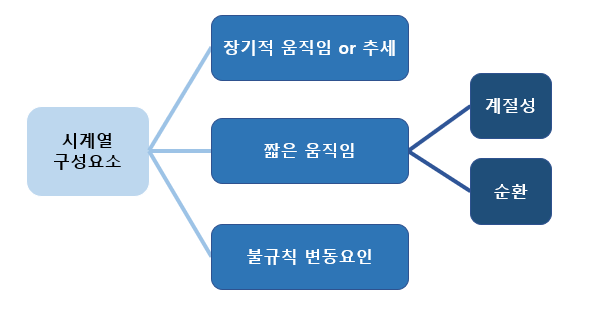

참조
https://velog.io/@yuns_u/%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0



In [1]:
# 프로펫?

!pip install statsmodels==0.11.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.7 MB 2.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.8.0 requires statsmodels>=0.12.1, but you have statsmodels 0.11.1 which is incompatible.


In [2]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

%matplotlib inline

In [79]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request


In [10]:
# 야후 주식 홈페이지를 통해 네이버 주식 정보를 받아옴
url = 'https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS'

req = Request(url, headers={"User-Agent":"Chrome"})
page = urlopen(req).read()

soup = BeautifulSoup(page, 'html.parser')
tabel = soup.find('table')
df_raw = pd.read_html(str(tabel))[0]
df_raw

# 날짜 데이터와 분석하고자 하는 데이터만 넣어서 시계열분석 진행
# 농수산 같은경우 그날의 데이터가 정확하기 때문에 예측하기 쉽다.



,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Sep 26, 2022",205500.00,208000.00,205500.00,205500.00,205500.00,97009
1,"Sep 23, 2022",207500.00,212500.00,207500.00,210500.00,210500.00,655441
2,"Sep 22, 2022",207500.00,209500.00,204000.00,206500.00,206500.00,693460
3,"Sep 21, 2022",216500.00,217000.00,212000.00,213000.00,213000.00,493972
4,"Sep 20, 2022",220500.00,222000.00,218000.00,218000.00,218000.00,240498
...,...,...,...,...,...,...,...
96,"May 04, 2022",282000.00,287000.00,279500.00,282000.00,282000.00,394212
97,"May 03, 2022",280500.00,284000.00,280000.00,282000.00,282000.00,419535
98,"May 02, 2022",281000.00,282500.00,279000.00,281000.00,281000.00,509250
99,"Apr 29, 2022",282500.00,287500.00,281500.00,286500.00,286500.00,540274


In [15]:
# 분석하고자 하는 데이터만 추출
df_tmp = pd.DataFrame({'ds':df_raw['Date'], 'y':df_raw['Close*']})

# 불필요한 행 제거
df_target = df_tmp[:-1]
df_target

,ds,y
0,"Sep 26, 2022",205500.00
1,"Sep 23, 2022",210500.00
2,"Sep 22, 2022",206500.00
3,"Sep 21, 2022",213000.00
4,"Sep 20, 2022",218000.00
...,...,...
95,"May 06, 2022",272000.00
96,"May 04, 2022",282000.00
97,"May 03, 2022",282000.00
98,"May 02, 2022",281000.00


In [22]:
df_target['ds'] = pd.to_datetime(df_target['ds'], format='%b %d, %Y')
df_target

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ds,y
0,2022-09-26,205500.0
1,2022-09-23,210500.0
2,2022-09-22,206500.0
3,2022-09-21,213000.0
4,2022-09-20,218000.0
...,...,...
95,2022-05-06,272000.0
96,2022-05-04,282000.0
97,2022-05-03,282000.0
98,2022-05-02,281000.0


In [23]:
df_target['y'] = df_target['y'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_target

,ds,y
0,2022-09-26,205500.0
1,2022-09-23,210500.0
2,2022-09-22,206500.0
3,2022-09-21,213000.0
4,2022-09-20,218000.0
...,...,...
95,2022-05-06,272000.0
96,2022-05-04,282000.0
97,2022-05-03,282000.0
98,2022-05-02,281000.0


In [27]:
#prohet 선언후 df 추가
m = Prophet()
m.fit(df_target)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp102ed1gw/ogpgak4i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp102ed1gw/cqgcydna.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68345', 'data', 'file=/tmp/tmp102ed1gw/ogpgak4i.json', 'init=/tmp/tmp102ed1gw/cqgcydna.json', 'output', 'file=/tmp/tmpt45y7qiq/prophet_model-20220926010418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:04:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:04:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
# periods= 365는 기간 설정
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
460,2023-09-22
461,2023-09-23
462,2023-09-24
463,2023-09-25
464,2023-09-26


In [29]:
forecast = m.predict(future)

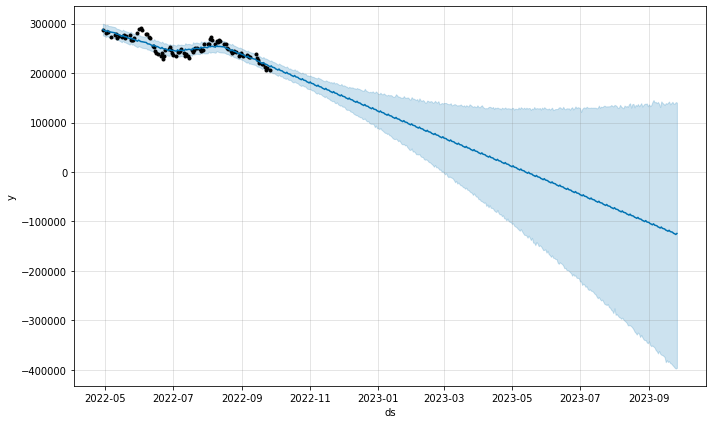

In [30]:
fig1 = m.plot(forecast)

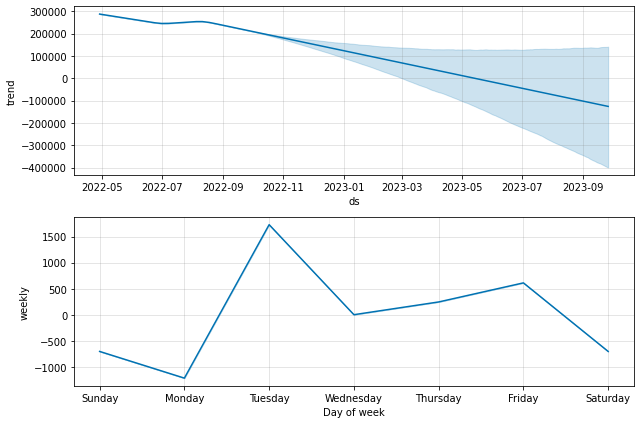

In [31]:
fig2 = m.plot_components(forecast)

In [32]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [33]:
plot_components_plotly(m, forecast)

In [34]:
# seasonality 설정에 따라 많이 달라짐
# defualt 값을 10으로 설정 되어있음
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df_target)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp102ed1gw/u28_up2t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp102ed1gw/07g71c0z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49791', 'data', 'file=/tmp/tmp102ed1gw/u28_up2t.json', 'init=/tmp/tmp102ed1gw/07g71c0z.json', 'output', 'file=/tmp/tmpo_qdne05/prophet_model-20220926010859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:08:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [40]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
125,2022-10-22,237364.887164,230053.970289,244432.961387
126,2022-10-23,231917.718604,225001.974079,239015.169926
127,2022-10-24,225530.709242,218285.597234,232858.605762
128,2022-10-25,220344.264326,213185.485975,227391.659897
129,2022-10-26,212609.381671,205178.674515,219777.954406


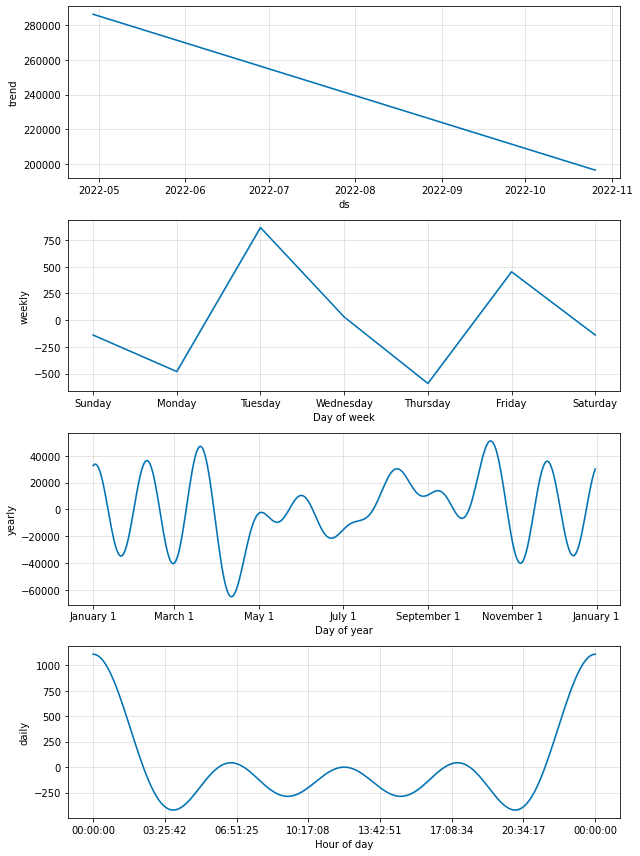

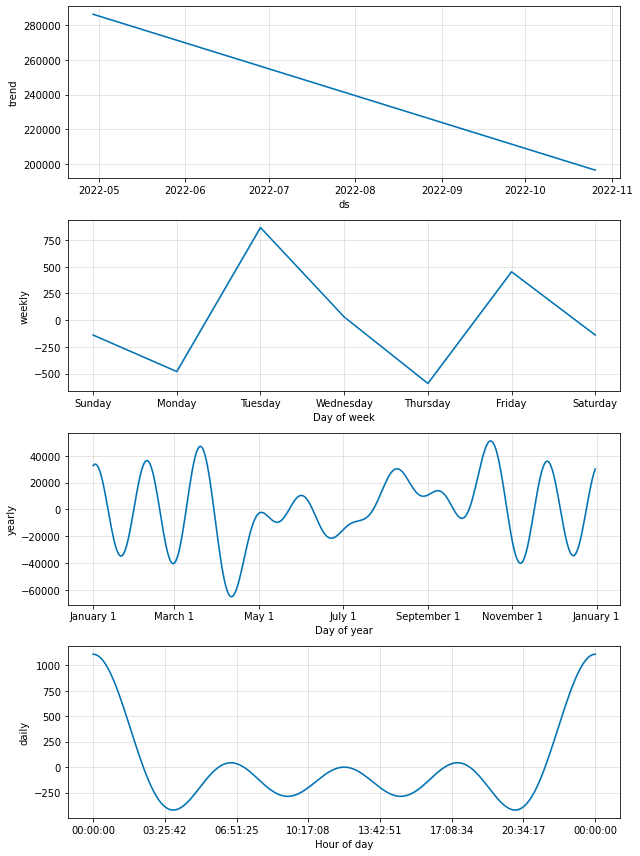

In [43]:
m.plot_components(forecast)

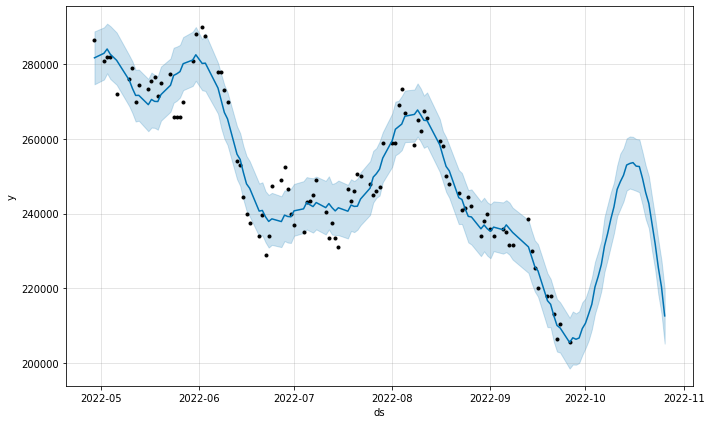

In [41]:
fig1 = m.plot(forecast)

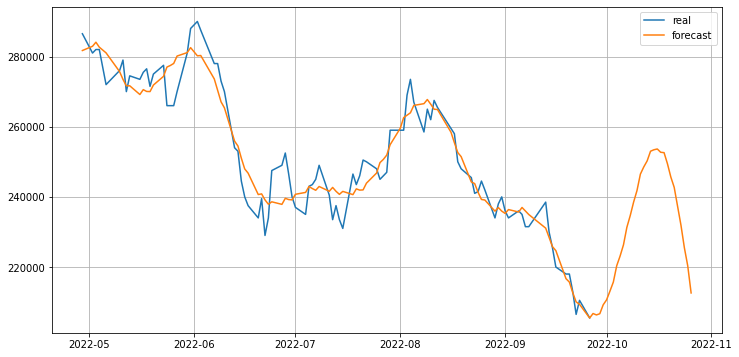

In [46]:
plt.figure(figsize=(12,6))
plt.plot(df_target['ds'], df_target['y'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# tutorial start
# https://facebook.github.io/prophet/docs/quick_start.html
# Quick Start

In [ ]:
# 주식 데이터를 가져오는 방법
# pandas의 주가 정보를 읽어오는 기능이 있다.
# pip install yfinance

In [47]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [80]:
# 주식 정보 불러오는 코드
# 데이터 분석에서 활용할 수 있다.
# 
import yfinance as yf
from pandas_datareader import data

In [81]:
yf.pdr_override()

start_date = '2020-01-01' # 데이터 수집 시작날짜
end_date = '2022-09-26'  # 데이터 수집 마지막 날짜

hyundai = data.get_data_yahoo('005380.KS', start_date, end_date)
hyundai


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2022-09-19,300.089996,309.839996,297.799988,309.070007,309.070007,60231200
2022-09-20,306.910004,313.329987,305.579987,308.730011,308.730011,61642800
2022-09-21,308.290009,313.799988,300.630005,300.799988,300.799988,62555700


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

%matplotlib inline

In [84]:
df_h = pd.DataFrame({'ds':hyundai.index, 'y':hyundai['Close']})
df_h.reset_index(inplace=True)
del df_h['Date']
df_h

,ds,y
0,2020-01-02,118000.0
1,2020-01-03,116000.0
2,2020-01-06,116000.0
3,2020-01-07,115500.0
4,2020-01-08,112000.0
...,...,...
668,2022-09-19,201500.0
669,2022-09-20,198500.0
670,2022-09-21,197000.0
671,2022-09-22,193500.0


In [86]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df_h)

future = m.make_future_dataframe(periods= 365)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpd8fvezxt/6otx3sfz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd8fvezxt/7vcxgqho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88730', 'data', 'file=/tmp/tmpd8fvezxt/6otx3sfz.json', 'init=/tmp/tmpd8fvezxt/7vcxgqho.json', 'output', 'file=/tmp/tmplfdu7tpc/prophet_model-20220926034012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:40:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:40:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1033,2023-09-19,218334.101906,154070.819223,282333.993370
1034,2023-09-20,217829.635732,154862.976531,280263.386255
1035,2023-09-21,216953.394295,154021.528548,282007.133214
1036,2023-09-22,216606.721578,151362.532260,280388.976855
1037,2023-09-23,218771.028404,156658.830878,282286.028920


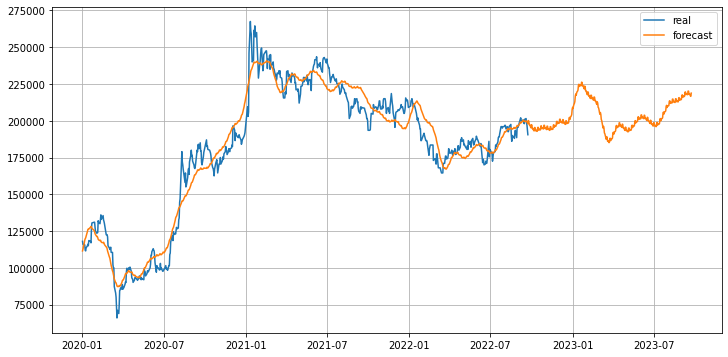

In [87]:
plt.figure(figsize=(12,6))
plt.plot(df_h['ds'], df_h['y'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.legend()
plt.grid(True)
plt.show()

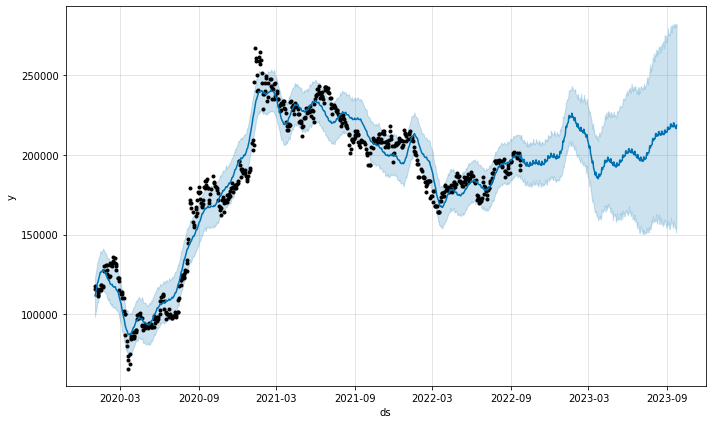

In [88]:
fig1 = m.plot(forecast)

In [89]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [92]:
# 위에 쓴 기능들을 함수화
def make_predic(invest):
    yf.pdr_override()

    start_date = '2020-01-01'
    end_date = '2022-09-26'
    print(f'{invest}')

    tmp = data.get_data_yahoo(f'{invest}', start_date, end_date)
    df = pd.DataFrame({'ds':tmp.index, 'y':tmp['Close']})
    df.reset_index(inplace=True)
    del df['Date']

    m = Prophet(yearly_seasonality=True, daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods= 365)
    forecast = m.predict(future)
    forecast[['ds','yhat','yhat_lower','yhat_upper']]

    

    plt.figure(figsize=(12,6))
    plt.plot(df['ds'], df['y'], label='real')
    plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
    plt.legend()
    plt.grid(True)
    

    plt.show()
    

005380.KS
[*********************100%***********************]  1 of 1 completed


DEBUG:cmdstanpy:input tempfile: /tmp/tmpd8fvezxt/myx2_bbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd8fvezxt/vkas8y1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5450', 'data', 'file=/tmp/tmpd8fvezxt/myx2_bbl.json', 'init=/tmp/tmpd8fvezxt/vkas8y1z.json', 'output', 'file=/tmp/tmpryyah44e/prophet_model-20220926034629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:46:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:46:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


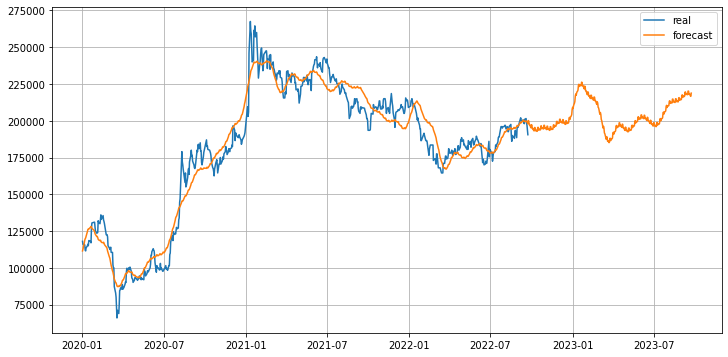

In [94]:
make_predic('005380.KS')

NVDA
[*********************100%***********************]  1 of 1 completed

DEBUG:cmdstanpy:input tempfile: /tmp/tmpd8fvezxt/sdjvo7_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd8fvezxt/k2mlftqj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99960', 'data', 'file=/tmp/tmpd8fvezxt/sdjvo7_f.json', 'init=/tmp/tmpd8fvezxt/k2mlftqj.json', 'output', 'file=/tmp/tmpwm6pjgl1/prophet_model-20220926034224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:42:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


03:42:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


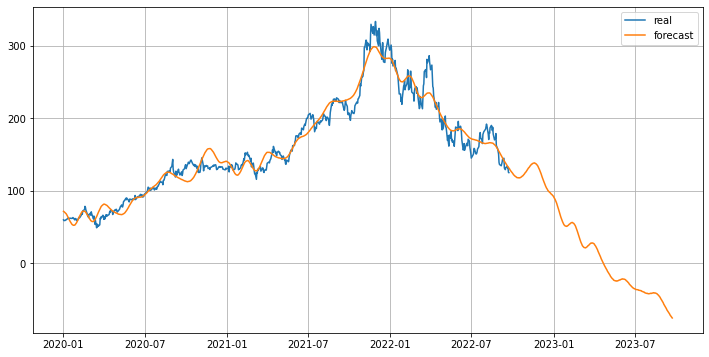

In [93]:
make_predic('NVDA')

# RNN (Recurrent Neural Network)
단점 : 긴기간의 의존성을 완벽하게 다룰 수 없음, 단순한 예제에 대해서는 사람이 신중하게 parameter를 골라서 그 문제를 해결할 수 있음
단점을 보안해서 나온게 LSTM(Long Short-Term Memory)

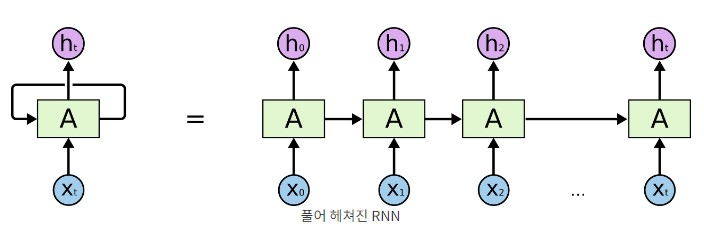

# LSTM (Long Short-Term Memory)

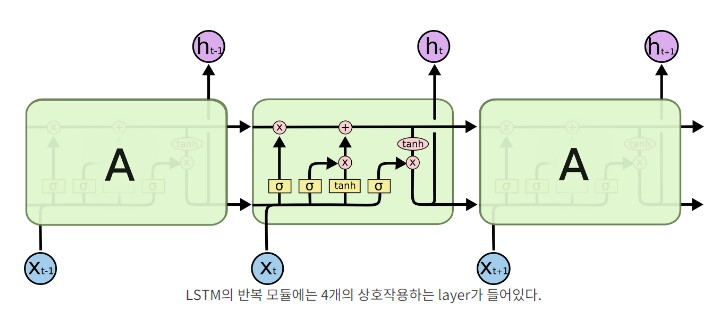